In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

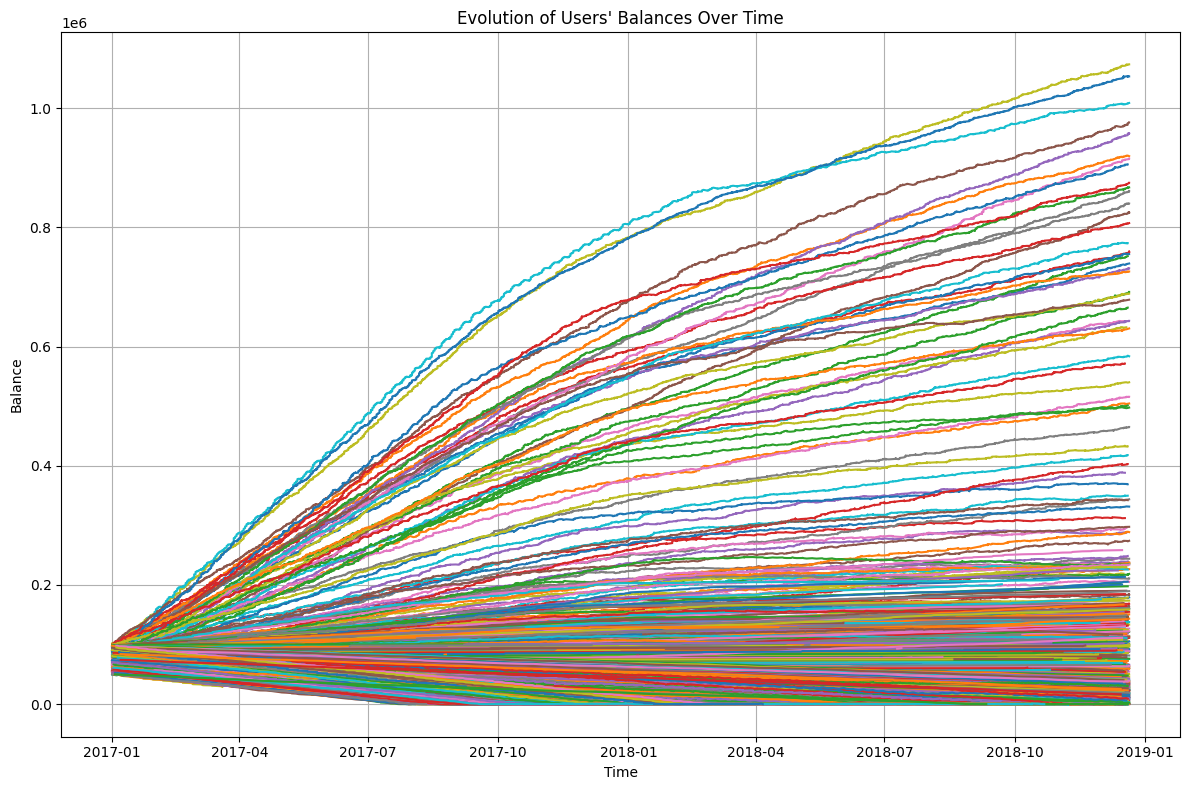

In [3]:
# Load the accounts and transactions data
accounts_df = pd.read_csv('sample/accounts.csv')
transactions_df = pd.read_csv('sample/transactions.csv')

# Convert tran_timestamp to datetime
transactions_df['tran_timestamp'] = pd.to_datetime(transactions_df['tran_timestamp'])

# Initialize a dictionary to store balance history for each account
balance_history = {acct_id: [] for acct_id in accounts_df['acct_id']}
timestamps = {acct_id: [] for acct_id in accounts_df['acct_id']}

# Initialize balances with the initial_deposit
balances = {acct_id: initial_deposit for acct_id, initial_deposit in zip(accounts_df['acct_id'], accounts_df['initial_deposit'])}

# Sort transactions by timestamp
transactions_df = transactions_df.sort_values(by='tran_timestamp')

# Process each transaction and update balances
for _, transaction in transactions_df.iterrows():
    orig_acct = transaction['orig_acct']
    bene_acct = transaction['bene_acct']
    base_amt = transaction['base_amt']
    tx_type = transaction['tx_type']
    timestamp = transaction['tran_timestamp']

    # Update the originator's balance
    if orig_acct in balances:
        if tx_type == 'TRANSFER' or tx_type == 'WITHDRAWAL':
            balances[orig_acct] -= base_amt
        elif tx_type == 'DEPOSIT':
            balances[orig_acct] += base_amt

        # Record the balance and timestamp for the originator
        balance_history[orig_acct].append(balances[orig_acct])
        timestamps[orig_acct].append(timestamp)

    # Update the beneficiary's balance
    if bene_acct in balances:
        if tx_type == 'TRANSFER' or tx_type == 'DEPOSIT':
            balances[bene_acct] += base_amt
        elif tx_type == 'WITHDRAWAL':
            balances[bene_acct] -= base_amt

        # Record the balance and timestamp for the beneficiary
        balance_history[bene_acct].append(balances[bene_acct])
        timestamps[bene_acct].append(timestamp)

# Plot the balance evolution for each account
plt.figure(figsize=(12, 8))
for acct_id in balance_history:
    if balance_history[acct_id]:  # Only plot accounts with transactions
        plt.plot(timestamps[acct_id], balance_history[acct_id], label=f'Account {acct_id}')

plt.title('Evolution of Users\' Balances Over Time')
plt.xlabel('Time')
plt.ylabel('Balance')
# plt.legend(title='Account ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()